In [27]:
!pip install mlxtend

In [28]:
import pandas as pd

df = pd.read_csv('Customer Preference Survey (Responses) - Form Responses 1.csv')
df = df.drop(["NONE","Timestamp"],axis=1)

In [29]:
df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [30]:
missing = df.isnull().sum()
print(missing)

df1 = df.rename(columns={"Timestamp":"New_ID"})
df1['New_ID'] = df.index + 1

โปรแกรมแท้                                14
เครื่องซักผ้า                             14
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม                                 0
เครื่องดนตรี                               0
whey prote

In [31]:
hot_encoded_df=df1.fillna("ไม่เคยซื้อ").set_index('New_ID')

In [32]:
#missing = hot_encoded_df.isnull().sum()
#print(missing)

In [33]:
hot_encoded_df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
New_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
3,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [34]:
def encode_units(x):
    #print(x)
    if x in ("ไม่เคยซื้อ", "ไม่เคย", "ตัวเลือก 1"):
        return 0
    if x in ("เคยซื้อ", "เคย"):
        return 1
hot_encoded_df2 = hot_encoded_df.applymap(encode_units)
hot_encoded_df2.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
New_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
3,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
5,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [35]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df2, min_support=0.07, use_colnames=True)

In [36]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ผักกรอบ),(โปรแกรมแท้),0.344828,0.379310,0.137931,0.400000,1.054545,0.007134,1.034483
1,(โปรแกรมแท้),(ผักกรอบ),0.379310,0.344828,0.137931,0.363636,1.054545,0.007134,1.029557
2,(คอร์สเรียนเสริม),(โปรแกรมแท้),0.931034,0.379310,0.379310,0.407407,1.074074,0.026159,1.047414
3,(โปรแกรมแท้),(คอร์สเรียนเสริม),0.379310,0.931034,0.379310,1.000000,1.074074,0.026159,inf
4,(nintendo switch),(โปรแกรมแท้),0.241379,0.379310,0.103448,0.428571,1.129870,0.011891,1.086207
5,(โปรแกรมแท้),(nintendo switch),0.379310,0.241379,0.103448,0.272727,1.129870,0.011891,1.043103
6,(mechanical keyboard),(โปรแกรมแท้),0.172414,0.379310,0.103448,0.600000,1.581818,0.038050,1.551724
7,(โปรแกรมแท้),(mechanical keyboard),0.379310,0.172414,0.103448,0.272727,1.581818,0.038050,1.137931
8,(เคส ipad),(โปรแกรมแท้),0.896552,0.379310,0.344828,0.384615,1.013986,0.004756,1.008621
9,(โปรแกรมแท้),(เคส ipad),0.379310,0.896552,0.344828,0.909091,1.013986,0.004756,1.137931


In [37]:
rules[ (rules['antecedent support'] > rules['consequent support']) &
      (rules['lift'] >= 1) &
       (rules['support'] >= 0.3) &
       (rules['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
134,(เคส ipad),"(หูฟัง bluetooth (airpods,truewireless))",0.896552,0.758621,0.689655,0.769231,1.013986,0.009512,1.045977
631,"(คอร์สเรียนเสริม, รองเท้าวิ่ง)","(หูฟัง bluetooth (airpods,truewireless))",0.896552,0.758621,0.689655,0.769231,1.013986,0.009512,1.045977
633,(รองเท้าวิ่ง),"(คอร์สเรียนเสริม, หูฟัง bluetooth (airpods,tru...",0.965517,0.689655,0.689655,0.714286,1.035714,0.023781,1.086207
821,"(เคส ipad, รองเท้าวิ่ง)","(หูฟัง bluetooth (airpods,truewireless))",0.862069,0.758621,0.689655,0.800000,1.054545,0.035672,1.206897
823,(เคส ipad),"(หูฟัง bluetooth (airpods,truewireless), รองเท...",0.896552,0.758621,0.689655,0.769231,1.013986,0.009512,1.045977
825,(รองเท้าวิ่ง),"(เคส ipad, หูฟัง bluetooth (airpods,truewirele...",0.965517,0.689655,0.689655,0.714286,1.035714,0.023781,1.086207
847,"(เคส ipad, รองเท้าวิ่ง)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
1412,"(คอร์สเรียนเสริม, เคส ipad)",(Ebook),0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266
4625,"(คอร์สเรียนเสริม, เคส ipad, รองเท้าวิ่ง)","(หูฟัง bluetooth (airpods,truewireless))",0.793103,0.758621,0.620690,0.782609,1.031621,0.019025,1.110345


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s

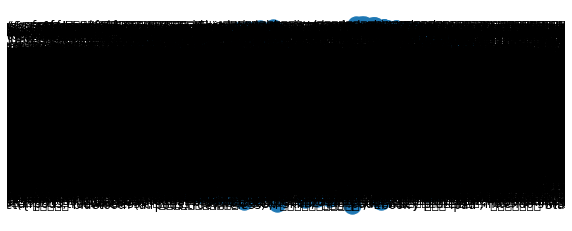

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [39]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df2.columns,columns=hot_encoded_df2.columns)

In [40]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df2.iloc[:,i],hot_encoded_df2.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [41]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [42]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3650 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s

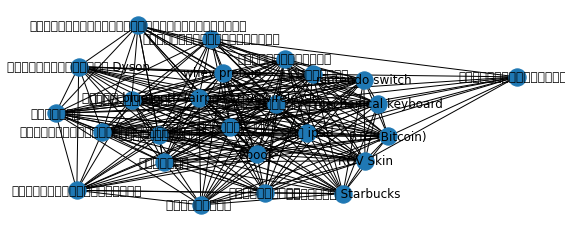

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

#**Recommended item**

สรุปแล้วว่าสินค้าที่น่าลองทำการแนะนำคือ 
1. รองเท้าวิ่ง --> หูฟัง bluetooth (airpods,truewireless) : ผู้ซื้ออาจเป็นกลุ่มคนรักสุขภาพที่ชอบฟังเพลงที่ต้องการซื้อรองเท้าสำหรับวิ่ง ซึ่งเราจะทำการแนะนำ หูฟัง bluetooth ให้เขาไปด้วย
2. เคส ipad --> หูฟัง bluetooth (airpods,truewireless) : เนื่องด้วยสถานการณ์โควิด จะเห็นว่าสินค้าจำพวก คอมพิวเตอร์, สมาร์ทโฟน, ไอแพด จะเป็นสินค้าที่มียอดขายเพิ่มมากขึ้นเพราะว่าเป็นช่วงที่คนกำลัง Work&Study from home เลยส่งผลให้มีกลุ่มผู้ซื้อที่ต้องการซื้อเคส ipad ไปด้วย โดยเราอาจทำการแนะนำ หูฟัง bluetooth ให้ผู้ซื้อเพิ่ม เนื่องจากมันสามารถตัดเสียงรบกวนได้ซึ่งเหมาะมากกับผู้ซื้อกลุ่มนี้